# pytorch 0.4.1及び前提条件のインストール

In [1]:
!conda install pytorch=0.4.1 torchvision -c pytorch
!pip install progress
!pip install opencv-python-headless

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pytorch=0.4.1
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ninja-1.9.0                |   py36hfd86e86_0         1.6 MB
    ca-certificates-2019.11.27 |                0         132 KB
    pytorch-0.4.1              |py36_py35_py27__9.0.176_7.1.2_2       471.7 MB  pytorch
    torchvision-0.2.1          |             py_2          37 KB  pytorch
    certifi-2019.11.28         |           py36_0         156 KB
    ------------------------------------------------------------
                                           Total:       473.7 MB

The following NEW packages will be INSTALLED:

    ninja:           1.9.0-py36hfd86e86_0                         
    pytorch:         0.4.1-py36_py35_py27__9.0.176_7.1.2_2 pytorch
    torchvision:     0.2

# CenterNetのソースコードの取得
https://github.com/xingyizhou/CenterNet

In [2]:
!git clone https://github.com/xingyizhou/CenterNet

Cloning into 'CenterNet'...
remote: Enumerating objects: 381, done.
remote: Total 381 (delta 0), reused 0 (delta 0), pack-reused 381
Receiving objects: 100% (381/381), 6.26 MiB | 0 bytes/s, done.
Resolving deltas: 100% (168/168), done.


# ソースコードの修正
- backboneとしてhourglass を使用するため、それ以外のネットワークの定義をコメントアウト

In [3]:
%%bash
cd CenterNet/src/lib/models/
sed -e "s/^from .networks.pose_dla_dcn/#from .networks.pose_dla_dcn/" model.py > model.py.tmp
mv model.py.tmp model.py
sed -e "s/^from .networks.resnet_dcn/#from .networks.resnet_dcn/" model.py > model.py.tmp
mv model.py.tmp model.py
sed -e "s/^  'dla'/#  'dla'/" model.py > model.py.tmp
mv model.py.tmp model.py
sed -e "s/^  'resdcn'/#  'resdcn'/" model.py > model.py.tmp
mv model.py.tmp model.py

- CPUで動かすため、GPU関連のコードをコメントアウト

In [4]:
%%bash
cd CenterNet/src/lib/detectors/
sed -e "s/torch.cuda.synchronize()/#torch.cuda.synchronize()/" base_detector.py > base_detector.py.tmp
mv base_detector.py.tmp base_detector.py
sed -e "s/torch.cuda.synchronize()/#torch.cuda.synchronize()/" ctdet.py > ctdet.py.tmp
mv ctdet.py.tmp ctdet.py

# 学習済みモデルのダウンロード
- hourglass用の学習済みモデルのダウンロード

https://github.com/xingyizhou/CenterNet/blob/master/readme/MODEL_ZOO.md

In [5]:
%%bash
curl -sc cookie.tmp "https://drive.google.com/uc?export=download&id=1cNyDmyorOduMRsgXoUnuyUiF6tZNFxaG" > /dev/null
CODE="$(awk '/_warning_/ {print $NF}' cookie.tmp)"  
curl -Lb cookie.tmp "https://drive.google.com/uc?export=download&confirm=${CODE}&id=1cNyDmyorOduMRsgXoUnuyUiF6tZNFxaG" -o ctdet_coco_hg.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0   2569      0 --:--:-- --:--:-- --:--:--  2569
100  730M    0  730M    0     0  91.4M      0 --:--:--  0:00:07 --:--:--  118M


# 物体検出テスト

In [6]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, 'CenterNet/src/lib')
from detectors.ctdet import CtdetDetector
from opts import opts
%matplotlib inline

NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make


### 学習済みモデルのロード

In [7]:
testimg = 'CenterNet/images/16004479832_a748d55f21_k.jpg'
opt = opts().init(args=['ctdet', '--demo', testimg, '--arch', 'hourglass', '--load_model', 'ctdet_coco_hg.pth', '--gpus', '-1'])
detector = CtdetDetector(opt)

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  CenterNet/src/lib/../../exp/ctdet/default
heads {'hm': 80, 'wh': 2, 'reg': 2}
Creating model...
loaded ctdet_coco_hg.pth, epoch 50


### 検出

In [8]:
ret = detector.run(testimg)

/opt/conda/envs/Python36/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


### 検出結果の表示

In [9]:
color_list = np.array(
        [
            1.000, 1.000, 1.000,
            0.850, 0.325, 0.098,
            0.929, 0.694, 0.125,
            0.494, 0.184, 0.556,
            0.466, 0.674, 0.188,
            0.301, 0.745, 0.933,
            0.635, 0.078, 0.184,
            0.300, 0.300, 0.300,
            0.600, 0.600, 0.600,
            1.000, 0.000, 0.000,
            1.000, 0.500, 0.000,
            0.749, 0.749, 0.000,
            0.000, 1.000, 0.000,
            0.000, 0.000, 1.000,
            0.667, 0.000, 1.000,
            0.333, 0.333, 0.000,
            0.333, 0.667, 0.000,
            0.333, 1.000, 0.000,
            0.667, 0.333, 0.000,
            0.667, 0.667, 0.000,
            0.667, 1.000, 0.000,
            1.000, 0.333, 0.000,
            1.000, 0.667, 0.000,
            1.000, 1.000, 0.000,
            0.000, 0.333, 0.500,
            0.000, 0.667, 0.500,
            0.000, 1.000, 0.500,
            0.333, 0.000, 0.500,
            0.333, 0.333, 0.500,
            0.333, 0.667, 0.500,
            0.333, 1.000, 0.500,
            0.667, 0.000, 0.500,
            0.667, 0.333, 0.500,
            0.667, 0.667, 0.500,
            0.667, 1.000, 0.500,
            1.000, 0.000, 0.500,
            1.000, 0.333, 0.500,
            1.000, 0.667, 0.500,
            1.000, 1.000, 0.500,
            0.000, 0.333, 1.000,
            0.000, 0.667, 1.000,
            0.000, 1.000, 1.000,
            0.333, 0.000, 1.000,
            0.333, 0.333, 1.000,
            0.333, 0.667, 1.000,
            0.333, 1.000, 1.000,
            0.667, 0.000, 1.000,
            0.667, 0.333, 1.000,
            0.667, 0.667, 1.000,
            0.667, 1.000, 1.000,
            1.000, 0.000, 1.000,
            1.000, 0.333, 1.000,
            1.000, 0.667, 1.000,
            0.167, 0.000, 0.000,
            0.333, 0.000, 0.000,
            0.500, 0.000, 0.000,
            0.667, 0.000, 0.000,
            0.833, 0.000, 0.000,
            1.000, 0.000, 0.000,
            0.000, 0.167, 0.000,
            0.000, 0.333, 0.000,
            0.000, 0.500, 0.000,
            0.000, 0.667, 0.000,
            0.000, 0.833, 0.000,
            0.000, 1.000, 0.000,
            0.000, 0.000, 0.167,
            0.000, 0.000, 0.333,
            0.000, 0.000, 0.500,
            0.000, 0.000, 0.667,
            0.000, 0.000, 0.833,
            0.000, 0.000, 1.000,
            0.000, 0.000, 0.000,
            0.143, 0.143, 0.143,
            0.286, 0.286, 0.286,
            0.429, 0.429, 0.429,
            0.571, 0.571, 0.571,
            0.714, 0.714, 0.714,
            0.857, 0.857, 0.857,
            0.000, 0.447, 0.741,
            0.50, 0.5, 0
        ]
    ).astype(np.float32)

color_list = color_list.reshape((-1, 3)) * 255
colors = [(color_list[_]).astype(np.uint8) \
            for _ in range(len(color_list))]
colors = np.array(colors, dtype=np.uint8).reshape(len(colors), 1, 1, 3)

coco_class_name = [
     'person', 'bicycle', 'car', 'motorcycle', 'airplane',
     'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
     'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
     'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
     'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
     'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
     'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
     'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
     'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
     'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
     'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
     'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
     'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
names = coco_class_name

In [10]:
imgout = cv2.imread(testimg)

In [11]:
for j in range(1, 80 + 1):
    for bbox in ret['results'][j]:
        conf = bbox[4]
        if conf > 0.3:
            #print(bbox[:4], j - 1, conf)
            #debugger.add_coco_bbox(bbox[:4], j - 1, bbox[4], img_id='ctdet')
            bbox = np.array(bbox[:4], dtype=np.int32)
            cat = int(j-1)
            c = colors[cat][0][0].tolist()
            txt = '{}{:.1f}'.format(names[cat], conf)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cat_size = cv2.getTextSize(txt, font, 0.5, 2)[0]
            cv2.rectangle(imgout, (bbox[0], bbox[1]), (bbox[2], bbox[3]), c, 2)
            cv2.rectangle(imgout,(bbox[0], bbox[1] - cat_size[1] - 2),(bbox[0] + cat_size[0], bbox[1] - 2), c, -1)
            cv2.putText(imgout, txt, (bbox[0], bbox[1] - 2), font, 0.5, (0, 0, 0), thickness=1, lineType=cv2.LINE_AA)

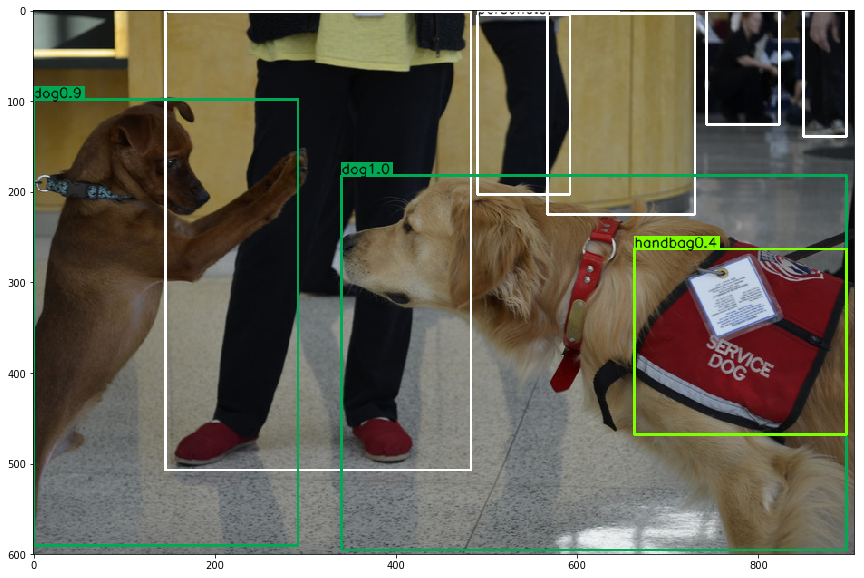

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(imgout, cv2.COLOR_BGR2RGB))